# Assignment 4
Before working on this assignment please read these instructions fully. In the submission area, you will notice that you can click the link to Preview the Grading for each step of the assignment. This is the criteria that will be used for peer grading. Please familiarize yourself with the criteria before beginning the assignment.

This assignment requires that you to find at least two datasets on the web which are related, and that you visualize these datasets to answer a question with the broad topic of weather phenomena (see below) for the region of New Delhi, National Capital Territory of Delhi, India, or India more broadly.

You can merge these datasets with data from different regions if you like! For instance, you might want to compare New Delhi, National Capital Territory of Delhi, India to Ann Arbor, USA. In that case at least one source file must be about New Delhi, National Capital Territory of Delhi, India.

You are welcome to choose datasets at your discretion, but keep in mind they will be shared with your peers, so choose appropriate datasets. Sensitive, confidential, illicit, and proprietary materials are not good choices for datasets for this assignment. You are welcome to upload datasets of your own as well, and link to them using a third party repository such as github, bitbucket, pastebin, etc. Please be aware of the Coursera terms of service with respect to intellectual property.

Also, you are welcome to preserve data in its original language, but for the purposes of grading you should provide english translations. You are welcome to provide multiple visuals in different languages if you would like!

As this assignment is for the whole course, you must incorporate principles discussed in the first week, such as having as high data-ink ratio (Tufte) and aligning with Cairo’s principles of truth, beauty, function, and insight.

Here are the assignment instructions:

State the region and the domain category that your data sets are about (e.g., New Delhi, National Capital Territory of Delhi, India and weather phenomena).
You must state a question about the domain category and region that you identified as being interesting.
You must provide at least two links to available datasets. These could be links to files such as CSV or Excel files, or links to websites which might have data in tabular form, such as Wikipedia pages.
You must upload an image which addresses the research question you stated. In addition to addressing the question, this visual should follow Cairo's principles of truthfulness, functionality, beauty, and insightfulness.
You must contribute a short (1-2 paragraph) written justification of how your visualization addresses your stated research question.
What do we mean by weather phenomena? For this category you might want to consider seasonal changes, natural disasters, or historical trends.

Tips
Wikipedia is an excellent source of data, and I strongly encourage you to explore it for new data sources.
Many governments run open data initiatives at the city, region, and country levels, and these are wonderful resources for localized data sources.
Several international agencies, such as the United Nations, the World Bank, the Global Open Data Index are other great places to look for data.
This assignment requires you to convert and clean datafiles. Check out the discussion forums for tips on how to do this from various sources, and share your successes with your fellow students!
Example
Looking for an example? Here's what our course assistant put together for the Ann Arbor, MI, USA area using sports and athletics as the topic. Example Solution File

In [879]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib notebook

In [880]:
#Read the csv file
df=pd.read_csv('matches.csv')

In [881]:
df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [882]:
#Convert in date-time format
df['date']=pd.to_datetime(df['date'])
df=df.sort_values(by='date')

In [883]:
#Drop unnecessasry columns
df.drop(df.columns[[0,2,3,6,7,8,9,11,12,13,14,15,16,17]],axis=1,inplace=True)

In [884]:
df.head()

,season,team1,team2,winner
59,2008,Kolkata Knight Riders,Royal Challengers Bangalore,Kolkata Knight Riders
60,2008,Chennai Super Kings,Kings XI Punjab,Chennai Super Kings
61,2008,Rajasthan Royals,Delhi Daredevils,Delhi Daredevils
62,2008,Mumbai Indians,Royal Challengers Bangalore,Royal Challengers Bangalore
63,2008,Deccan Chargers,Kolkata Knight Riders,Kolkata Knight Riders


In [885]:
#Change name to short name and rising supergiang to csk also
df=df.replace(to_replace='Kolkata Knight Riders', value='kkr')
df=df.replace(to_replace=['Chennai Super Kings','Rising Pune Supergiants','Rising Pune Supergiant'], value='csk')
df=df.replace(to_replace='Mumbai Indians', value='mi')
df=df.replace(to_replace=['Sunrisers Hyderabad','Deccan Chargers'], value='srh')
df=df[(df['team1']=='mi') | (df['team2']=='mi') | (df['team1']=='csk') | (df['team2']=='csk') |(df['team1']=='kkr') | (df['team2']=='kkr') |(df['team1']=='srh') | (df['team2']=='srh')]


In [886]:
df.head()

,season,team1,team2,winner
59,2008,kkr,Royal Challengers Bangalore,kkr
60,2008,csk,Kings XI Punjab,csk
62,2008,mi,Royal Challengers Bangalore,Royal Challengers Bangalore
63,2008,srh,kkr,kkr
65,2008,srh,Delhi Daredevils,Delhi Daredevils


In [887]:
#Rename the column
df=df.rename(columns={'season':'Season'})

In [888]:
#Create new dataframe containg only required teams.
df_mi=df[(df['team1']=='mi') | (df['team2']=='mi')]
df_mi_winner=df_mi[df_mi['winner']=='mi']

df_csk=df[(df['team1']=='csk') | (df['team2']=='csk')]
df_csk_winner=df_csk[df_csk['winner']=='csk']

df_srh=df[(df['team1']=='srh') | (df['team2']=='srh')]
df_srh_winner=df_srh[df_srh['winner']=='srh']


df_kkr=df[(df['team1']=='kkr') | (df['team2']=='kkr')]
df_kkr_winner=df_kkr[df_kkr['winner']=='kkr']


In [889]:
#Drop the Team1 and Team2 Column
df_mi.drop(df_mi.columns[[1,2]],axis=1,inplace=True)
df_mi_winner.drop(df_mi_winner.columns[[1,2]],axis=1,inplace=True)

df_csk.drop(df_csk.columns[[1,2]],axis=1,inplace=True)
df_csk_winner.drop(df_csk_winner.columns[[1,2]],axis=1,inplace=True)

df_srh.drop(df_srh.columns[[1,2]],axis=1,inplace=True)
df_srh_winner.drop(df_srh_winner.columns[[1,2]],axis=1,inplace=True)

df_kkr.drop(df_kkr.columns[[1,2]],axis=1,inplace=True)
df_kkr_winner.drop(df_kkr_winner.columns[[1,2]],axis=1,inplace=True)



C:\Users\Mac\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [890]:
#Count the number of matches in each season.
a=df_mi_winner.groupby('Season').count()
a['total_mi']=df_mi.groupby('Season').count()

a['winner_csk']=df_csk_winner.groupby('Season').count()['winner']
a['total_csk']=df_csk.groupby('Season').count()

a['winner_srh']=df_srh_winner.groupby('Season').count()['winner']
a['total_srh']=df_srh.groupby('Season').count()

a['winner_kkr']=df_kkr_winner.groupby('Season').count()['winner']
a['total_kkr']=df_kkr.groupby('Season').count()



In [891]:

a=a.reset_index()
a=a.rename(columns={'winner':'winner_mi'})


In [892]:
#Calculate the Percentage Win

a['Mumbai Indians']=round((a['winner_mi']/a['total_mi']),3)*100

a['Chennai Super Kings']=round((a['winner_csk']/a['total_csk']),3)*100

a['Sunrises Hyderabad']=round((a['winner_srh']/a['total_srh']),3)*100

a['Kolkata Knight Riders']=round((a['winner_kkr']/a['total_kkr']),3)*100

In [893]:
a

,Season,winner_mi,total_mi,winner_csk,total_csk,winner_srh,total_srh,winner_kkr,total_kkr,Mumbai Indians,Chennai Super Kings,Sunrises Hyderabad,Kolkata Knight Riders
0,2008,7,14,9,16,2,14,6,13,50.0,56.2,14.3,46.2
1,2009,5,13,8,14,9,16,3,13,38.5,57.1,56.2,23.1
2,2010,11,16,9,16,8,16,7,14,68.8,56.2,50.0,50.0
3,2011,10,16,11,16,6,14,8,15,62.5,68.8,42.9,53.3
4,2012,10,17,10,18,4,15,12,17,58.8,55.6,26.7,70.6
5,2013,13,19,12,18,10,17,6,16,68.4,66.7,58.8,37.5
6,2014,7,15,10,16,6,14,11,16,46.7,62.5,42.9,68.8
7,2015,10,16,10,17,7,14,7,13,62.5,58.8,50.0,53.8
8,2016,7,14,5,14,11,17,8,15,50.0,35.7,64.7,53.3
9,2017,12,17,10,16,8,14,9,16,70.6,62.5,57.1,56.2


In [894]:
#Keep only Percentage column.
a.drop(a.columns[[1,2,3,4,5,6,7,8]],inplace=True,axis=1)

In [895]:
a

,Season,Mumbai Indians,Chennai Super Kings,Sunrises Hyderabad,Kolkata Knight Riders
0,2008,50.0,56.2,14.3,46.2
1,2009,38.5,57.1,56.2,23.1
2,2010,68.8,56.2,50.0,50.0
3,2011,62.5,68.8,42.9,53.3
4,2012,58.8,55.6,26.7,70.6
5,2013,68.4,66.7,58.8,37.5
6,2014,46.7,62.5,42.9,68.8
7,2015,62.5,58.8,50.0,53.8
8,2016,50.0,35.7,64.7,53.3
9,2017,70.6,62.5,57.1,56.2


In [896]:
#Melt the dataframe to make it individual columns intoone column so we can use hue .
a=a.melt('Season',var_name='Top 4 Teams',value_name='Percentage Win')

In [897]:
sns.set_style('whitegrid')

C:\Users\Mac\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


<IPython.core.display.Javascript object>


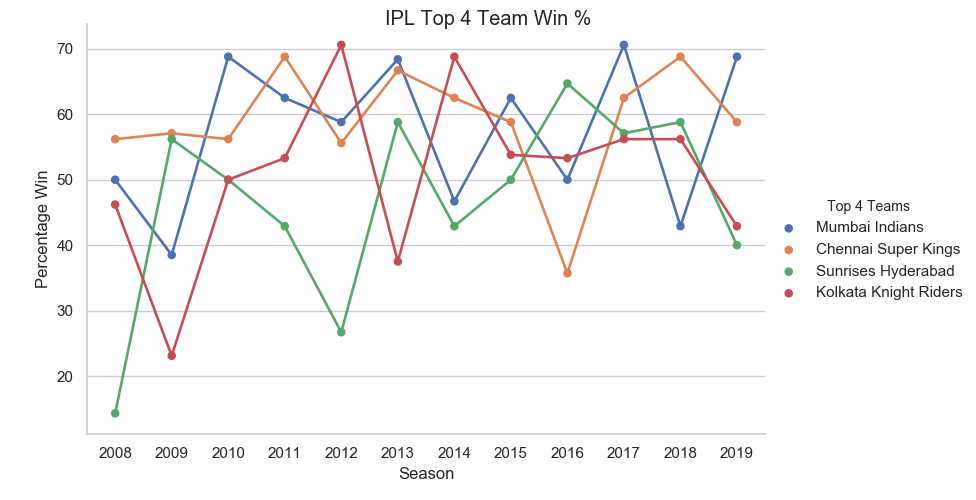

Text(0.5, 0.98, 'IPL Top 4 Team Win %')

In [898]:
#Factor Plot
ax=sns.factorplot(x="Season", y="Percentage Win", hue='Top 4 Teams', data=a,height=5,aspect=1.55,scale=0.7)
ax.fig.suptitle('IPL Top 4 Team Win %')